In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse

In [3]:
df=pd.read_csv('titanic.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


CHECKING MISSING VALUES


In [5]:
df.dtypes.value_counts()
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


HANDLING MISSING BY REMOVING TECHNIQUE


In [6]:
df.dropna(inplace=True)  # Removes the rows with any missing value
df.dropna(axis=1, thresh=len(df) * 0.7, inplace=True)  # Keeps columns which have  at least 70% valid data


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Identify and remove duplicate records.

In [8]:
# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [9]:
# Display duplicate rows
df[df.duplicated()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows after removal: 0


TREATING OUTLINERS

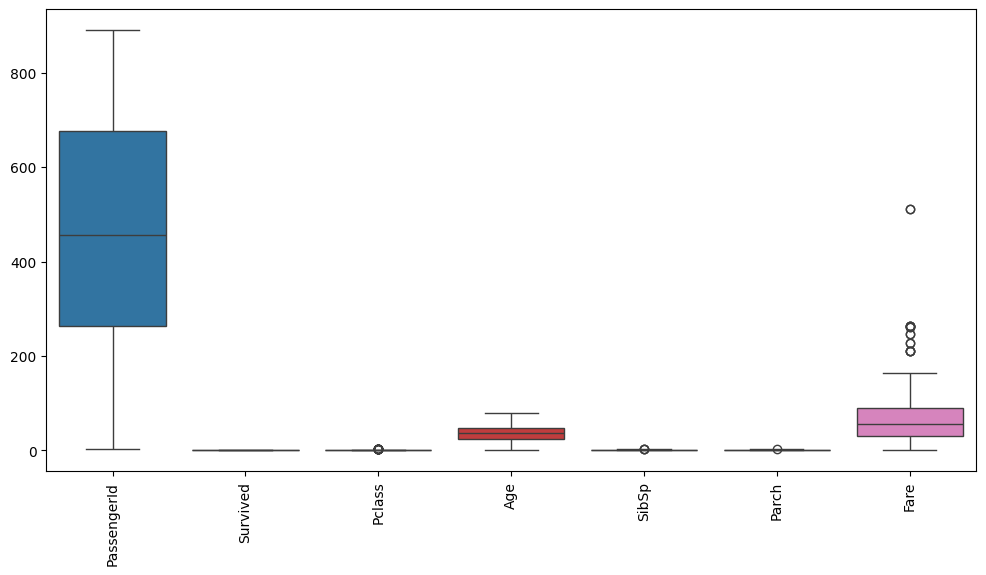

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()


In [12]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
# Select only numeric columns for quantile calculation
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers in numeric columns
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print("Number of outliers in each column:\n", outliers)

# Filter outliers only in numeric columns
# Use the index of numeric_df to select rows in the original DataFrame
df_cleaned = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
print("Dataset size before removing outliers:", df.shape)
print("Dataset size after removing outliers:", df_cleaned.shape)

Number of outliers in each column:
 PassengerId     0
Survived        0
Pclass         25
Age             0
SibSp           3
Parch           1
Fare           16
dtype: int64
Dataset size before removing outliers: (183, 12)
Dataset size after removing outliers: (142, 12)


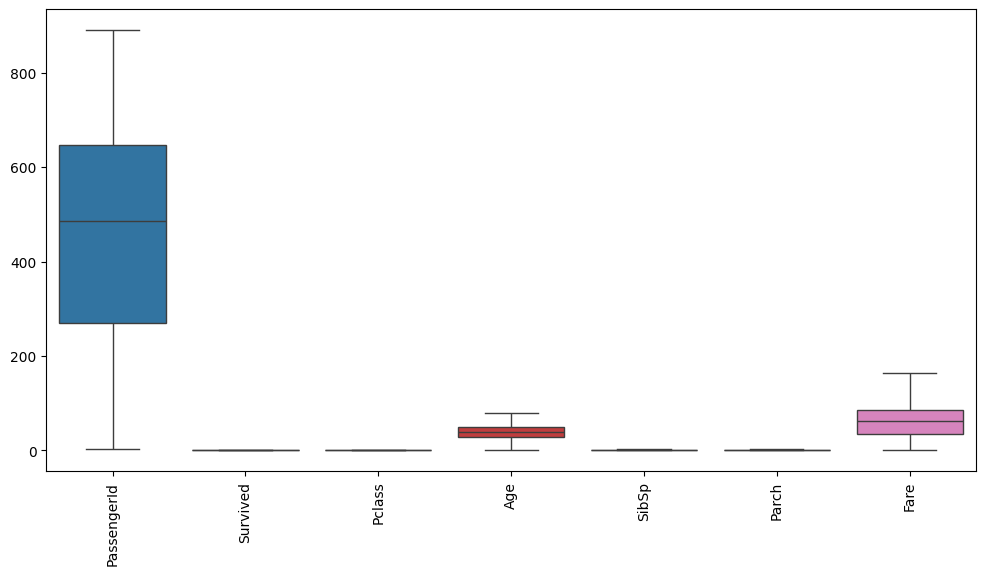

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()


Standardize categorical values

In [14]:
# List categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values in each categorical column
for col in categorical_columns:
    print(f"Unique values in {col}:\n", df[col].unique(), "\n")


Unique values in Name:
 ['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'McCarthy, Mr. Timothy J'
 'Sandstrom, Miss. Marguerite Rut' 'Bonnell, Miss. Elizabeth'
 'Beesley, Mr. Lawrence' 'Sloper, Mr. William Thompson'
 'Fortune, Mr. Charles Alexander'
 'Harper, Mrs. Henry Sleeper (Myna Haxtun)'
 'Ostby, Mr. Engelhart Cornelius' 'Harris, Mr. Henry Birkhardt'
 'Nye, Mrs. (Elizabeth Ramell)' 'Moen, Mr. Sigurd Hansen'
 'Fortune, Miss. Mabel Helen' 'Chaffee, Mr. Herbert Fuller'
 'Goldschmidt, Mr. George B' 'Greenfield, Mr. William Bertram'
 'White, Mr. Richard Frasar' 'Porter, Mr. Walter Chamberlain'
 'Baxter, Mr. Quigg Edmond' 'Webber, Miss. Susan'
 'White, Mr. Percival Wayland' 'Newsom, Miss. Helen Monypeny'
 'Futrelle, Mr. Jacques Heath' 'Giglio, Mr. Victor'
 'Navratil, Mr. Michel ("Louis M Hoffman")'
 'Pears, Mrs. Thomas (Edith Wearne)' 'Van der hoef, Mr. Wyckoff'
 'Smith, Mr. James Clinch' 'Isham, Miss. Ann Elizabeth'
 'Becker, Maste

In [15]:
for col in categorical_columns:
    df[col] = df[col].str.lower()


In [16]:
for col in categorical_columns:
    df[col] = df[col].str.strip()


In [17]:
for col in categorical_columns:
    print(f"Unique values in {col} after cleaning:\n", df[col].unique(), "\n")


Unique values in Name after cleaning:
 ['cumings, mrs. john bradley (florence briggs thayer)'
 'futrelle, mrs. jacques heath (lily may peel)' 'mccarthy, mr. timothy j'
 'sandstrom, miss. marguerite rut' 'bonnell, miss. elizabeth'
 'beesley, mr. lawrence' 'sloper, mr. william thompson'
 'fortune, mr. charles alexander'
 'harper, mrs. henry sleeper (myna haxtun)'
 'ostby, mr. engelhart cornelius' 'harris, mr. henry birkhardt'
 'nye, mrs. (elizabeth ramell)' 'moen, mr. sigurd hansen'
 'fortune, miss. mabel helen' 'chaffee, mr. herbert fuller'
 'goldschmidt, mr. george b' 'greenfield, mr. william bertram'
 'white, mr. richard frasar' 'porter, mr. walter chamberlain'
 'baxter, mr. quigg edmond' 'webber, miss. susan'
 'white, mr. percival wayland' 'newsom, miss. helen monypeny'
 'futrelle, mr. jacques heath' 'giglio, mr. victor'
 'navratil, mr. michel ("louis m hoffman")'
 'pears, mrs. thomas (edith wearne)' 'van der hoef, mr. wyckoff'
 'smith, mr. james clinch' 'isham, miss. ann elizabeth'


Exploratory Data Analysis (EDA):

Univariate Analysis (Single-Variable Exploration)

Summary statistics (mean, median, mode, variance, skewness)

In [24]:
# Summary statistics for numerical columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [20]:
# Calculate additional summary statistics for a specific numerical column
# Replace 'NumericalColumn' with an actual numerical column name from your DataFrame
column = 'Age'  # Example: Using 'Age' column

print(f"Mean: {df[column].mean()}")
print(f"Median: {df[column].median()}")
print(f"Mode: {df[column].mode()[0]}")
print(f"Variance: {df[column].var()}")
print(f"Standard Deviation: {df[column].std()}")
print(f"Skewness: {df[column].skew()}")
print(f"Kurtosis: {df[column].kurt()}")

Mean: 35.6744262295082
Median: 36.0
Mode: 36.0
Variance: 244.7305423887588
Standard Deviation: 15.643865966849717
Skewness: 0.00967583943600615
Kurtosis: -0.22618354101694615


2.Frequency distributions for categorical variables

In [21]:
# List categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display frequency counts for each categorical variable
for col in categorical_columns:
    print(f"Frequency distribution for {col}:\n")
    print(df[col].value_counts(), "\n")


Frequency distribution for Name:

Name
cumings, mrs. john bradley (florence briggs thayer)     1
appleton, mrs. edward dale (charlotte lamson)           1
silvey, mrs. william baird (alice munger)               1
thayer, mrs. john borland (marian longstreth morris)    1
ross, mr. john hugo                                     1
                                                       ..
ball, mrs. (ada e hall)                                 1
hippach, miss. jean gertrude                            1
partner, mr. austen                                     1
graham, mr. george edward                               1
behr, mr. karl howell                                   1
Name: count, Length: 183, dtype: int64 

Frequency distribution for Sex:

Sex
male      95
female    88
Name: count, dtype: int64 

Frequency distribution for Ticket:

Ticket
113760      4
19950       4
pc 17582    3
35273       3
24160       3
           ..
113784      1
113043      1
28551       1
36928       1
111369  

3.Histograms and box plots to visualize distributions

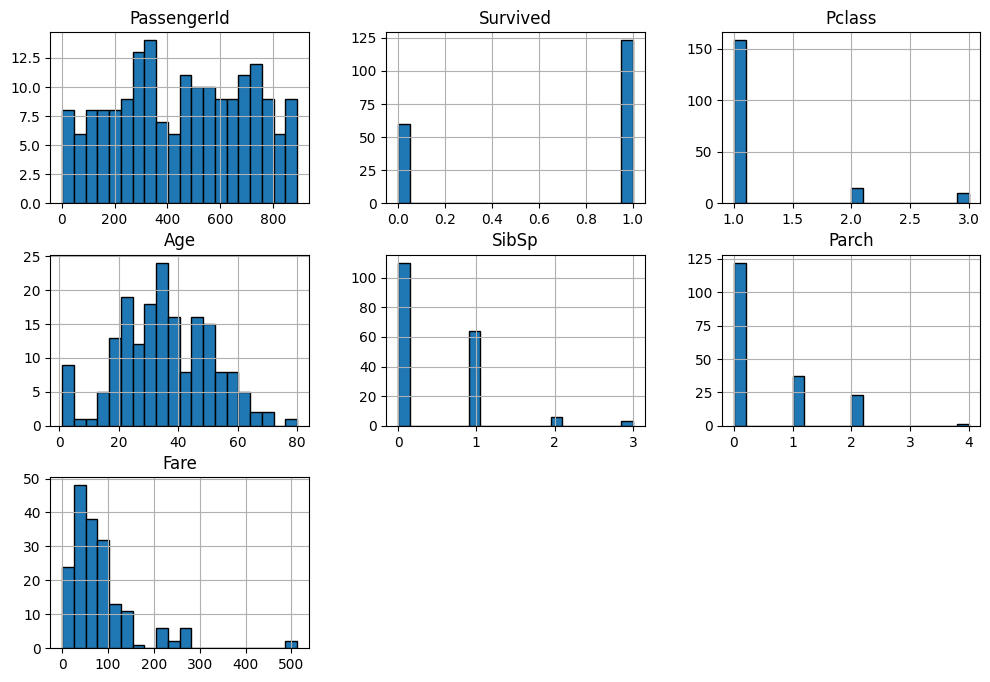

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.show()


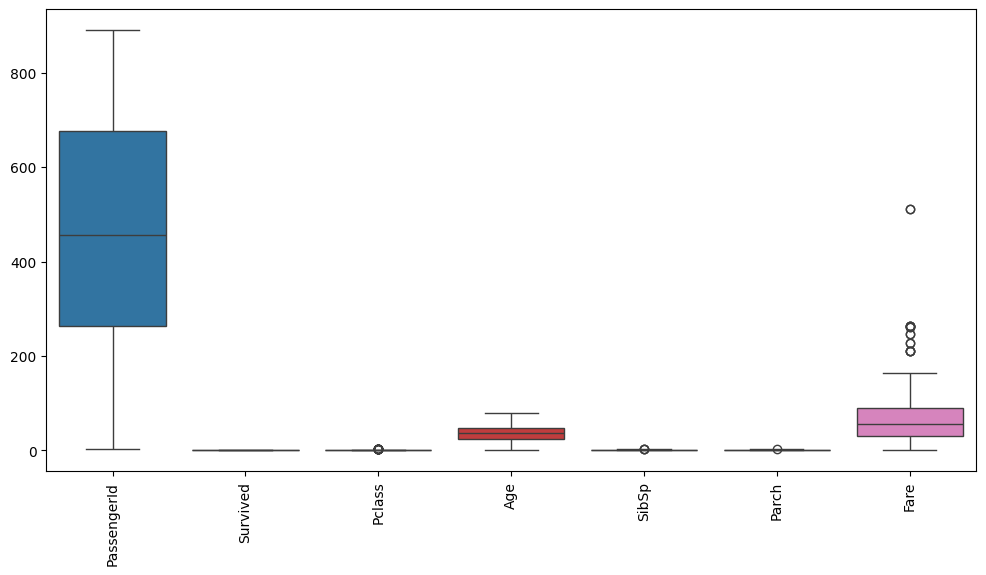

In [23]:
# Boxplot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


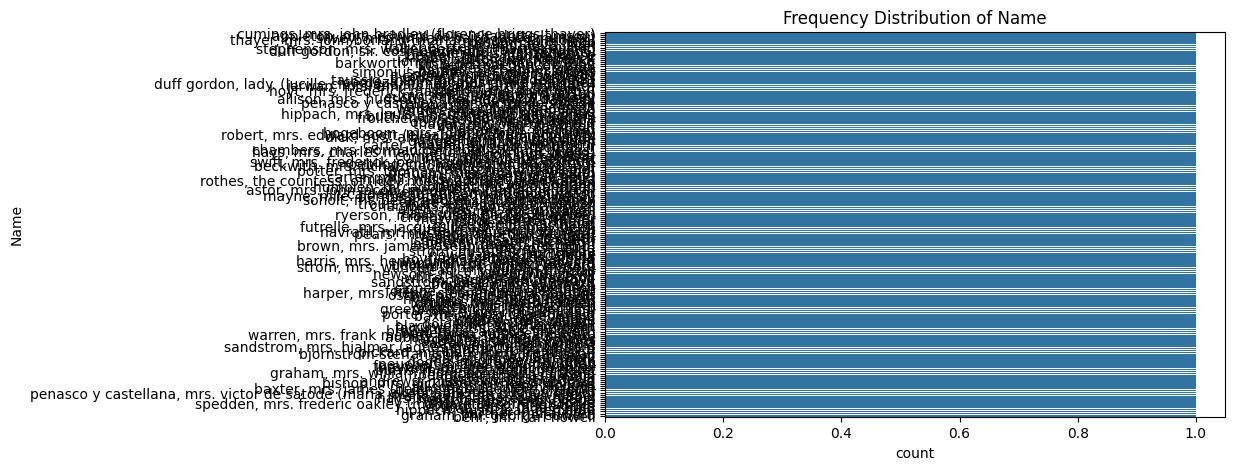

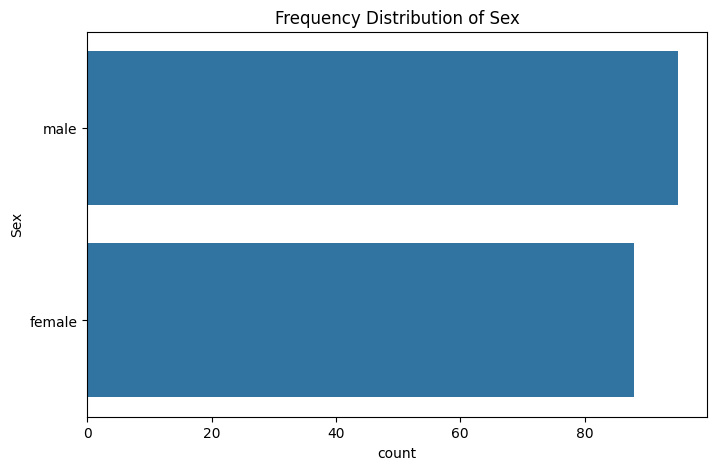

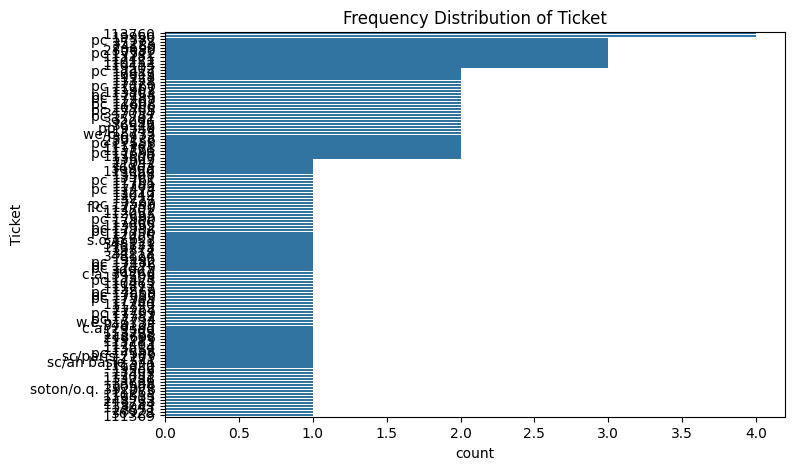

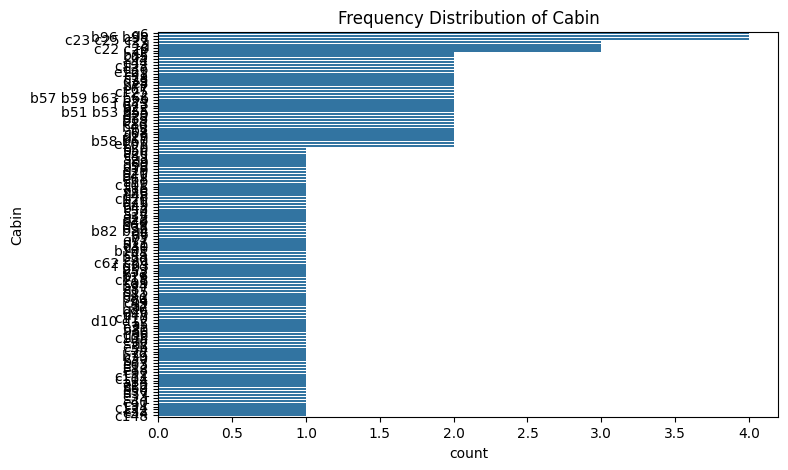

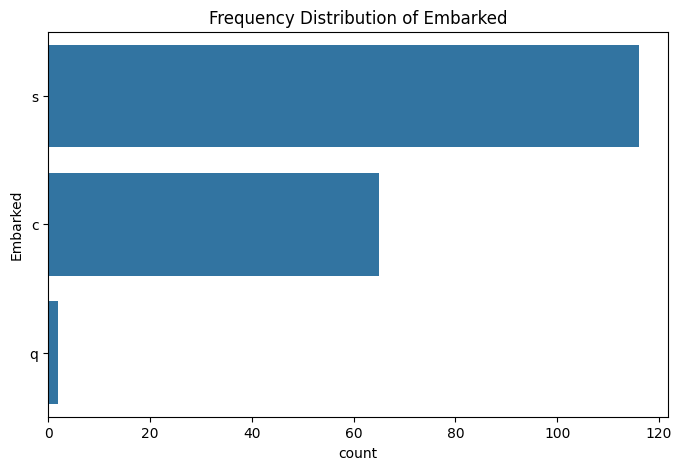

In [24]:
# Plot bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frequency Distribution of {col}")
    plt.show()


Bivariate Analysis (Two-Variable Exploration)

1. Correlation matrix to identify relationships between numerical variables.


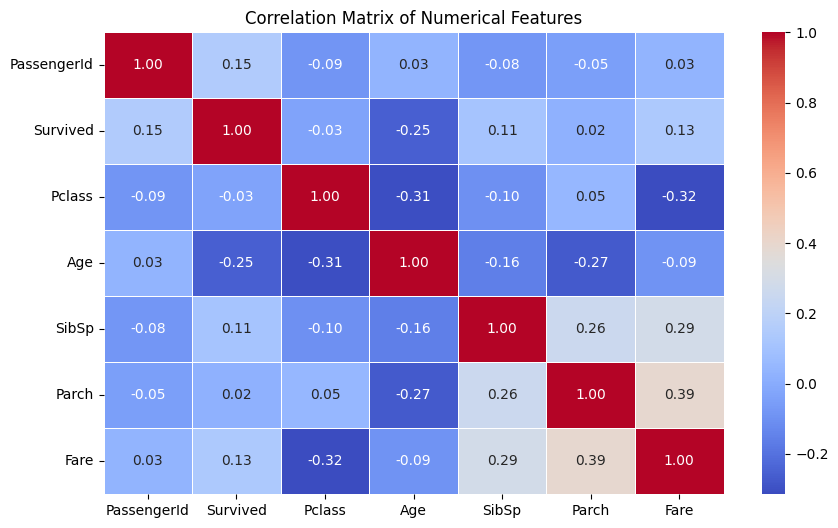

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix using only numeric columns
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

2.Scatter plots for continuous variable relationships

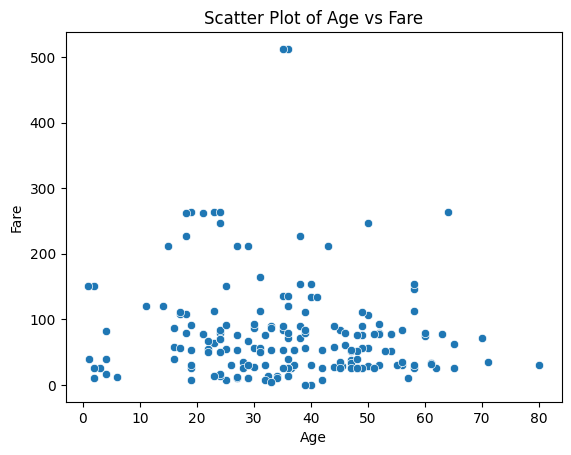

In [26]:
# Replace 'Variable1' and 'Variable2' with actual column names from your DataFrame
sns.scatterplot(x=df['Age'], y=df['Fare'])  # Example: Assuming 'Age' and 'Fare' are columns in your DataFrame
plt.title("Scatter Plot of Age vs Fare")
plt.show()

3.Bar plots, violin plots, and box plots to compare categorical and numerical variables

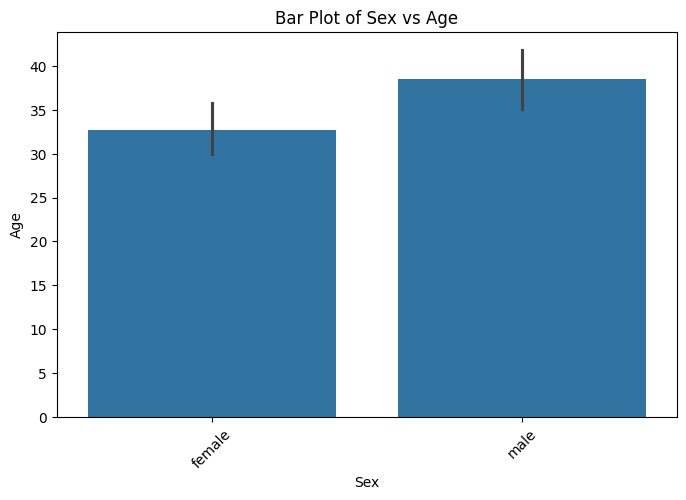

In [27]:
# Replace 'CategoryColumn' and 'NumericalColumn' with actual column names
# For example, if you want to analyze 'Sex' (categorical) and 'Age' (numerical):
plt.figure(figsize=(8,5))
sns.barplot(x=df['Sex'], y=df['Age'], estimator=np.mean)  # Replace with your actual column names
plt.title("Bar Plot of Sex vs Age")  # Update title accordingly
plt.xticks(rotation=45)
plt.show()

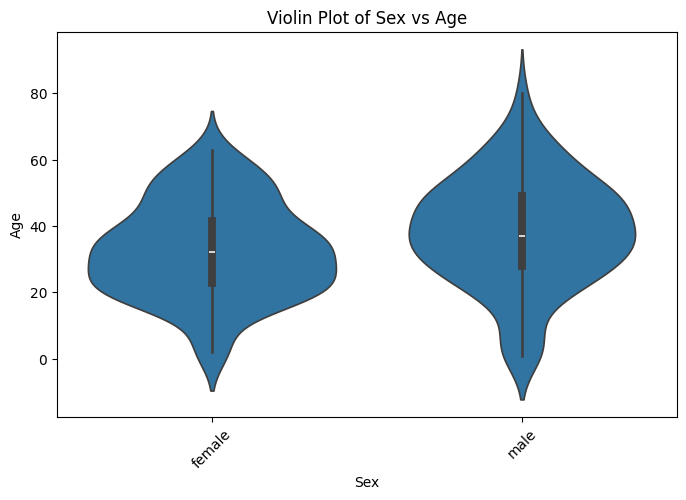

In [28]:
# Replace 'CategoryColumn' and 'NumericalColumn' with actual column names
# For example, if you want to analyze 'Sex' (categorical) and 'Age' (numerical):
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Sex'], y=df['Age'])  # Replace with your actual column names
plt.title("Violin Plot of Sex vs Age")  # Update title accordingly
plt.xticks(rotation=45)
plt.show()

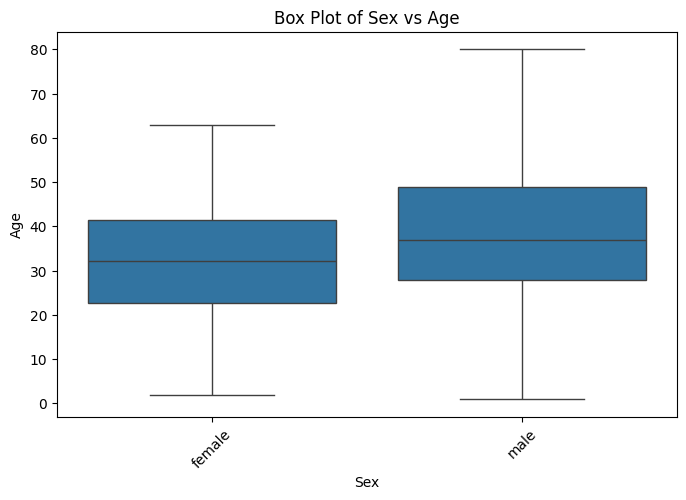

In [29]:
# Replace 'CategoryColumn' and 'NumericalColumn' with actual column names
# For example, if you want to analyze 'Sex' (categorical) and 'Age' (numerical):
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Sex'], y=df['Age'])  # Replace with your actual column names
plt.title("Box Plot of Sex vs Age")  # Update title accordingly
plt.xticks(rotation=45)
plt.show()

Multivariate Analysis (Multiple Variables Exploration)

1.Pair plots to analyze multiple relationships simultaneously

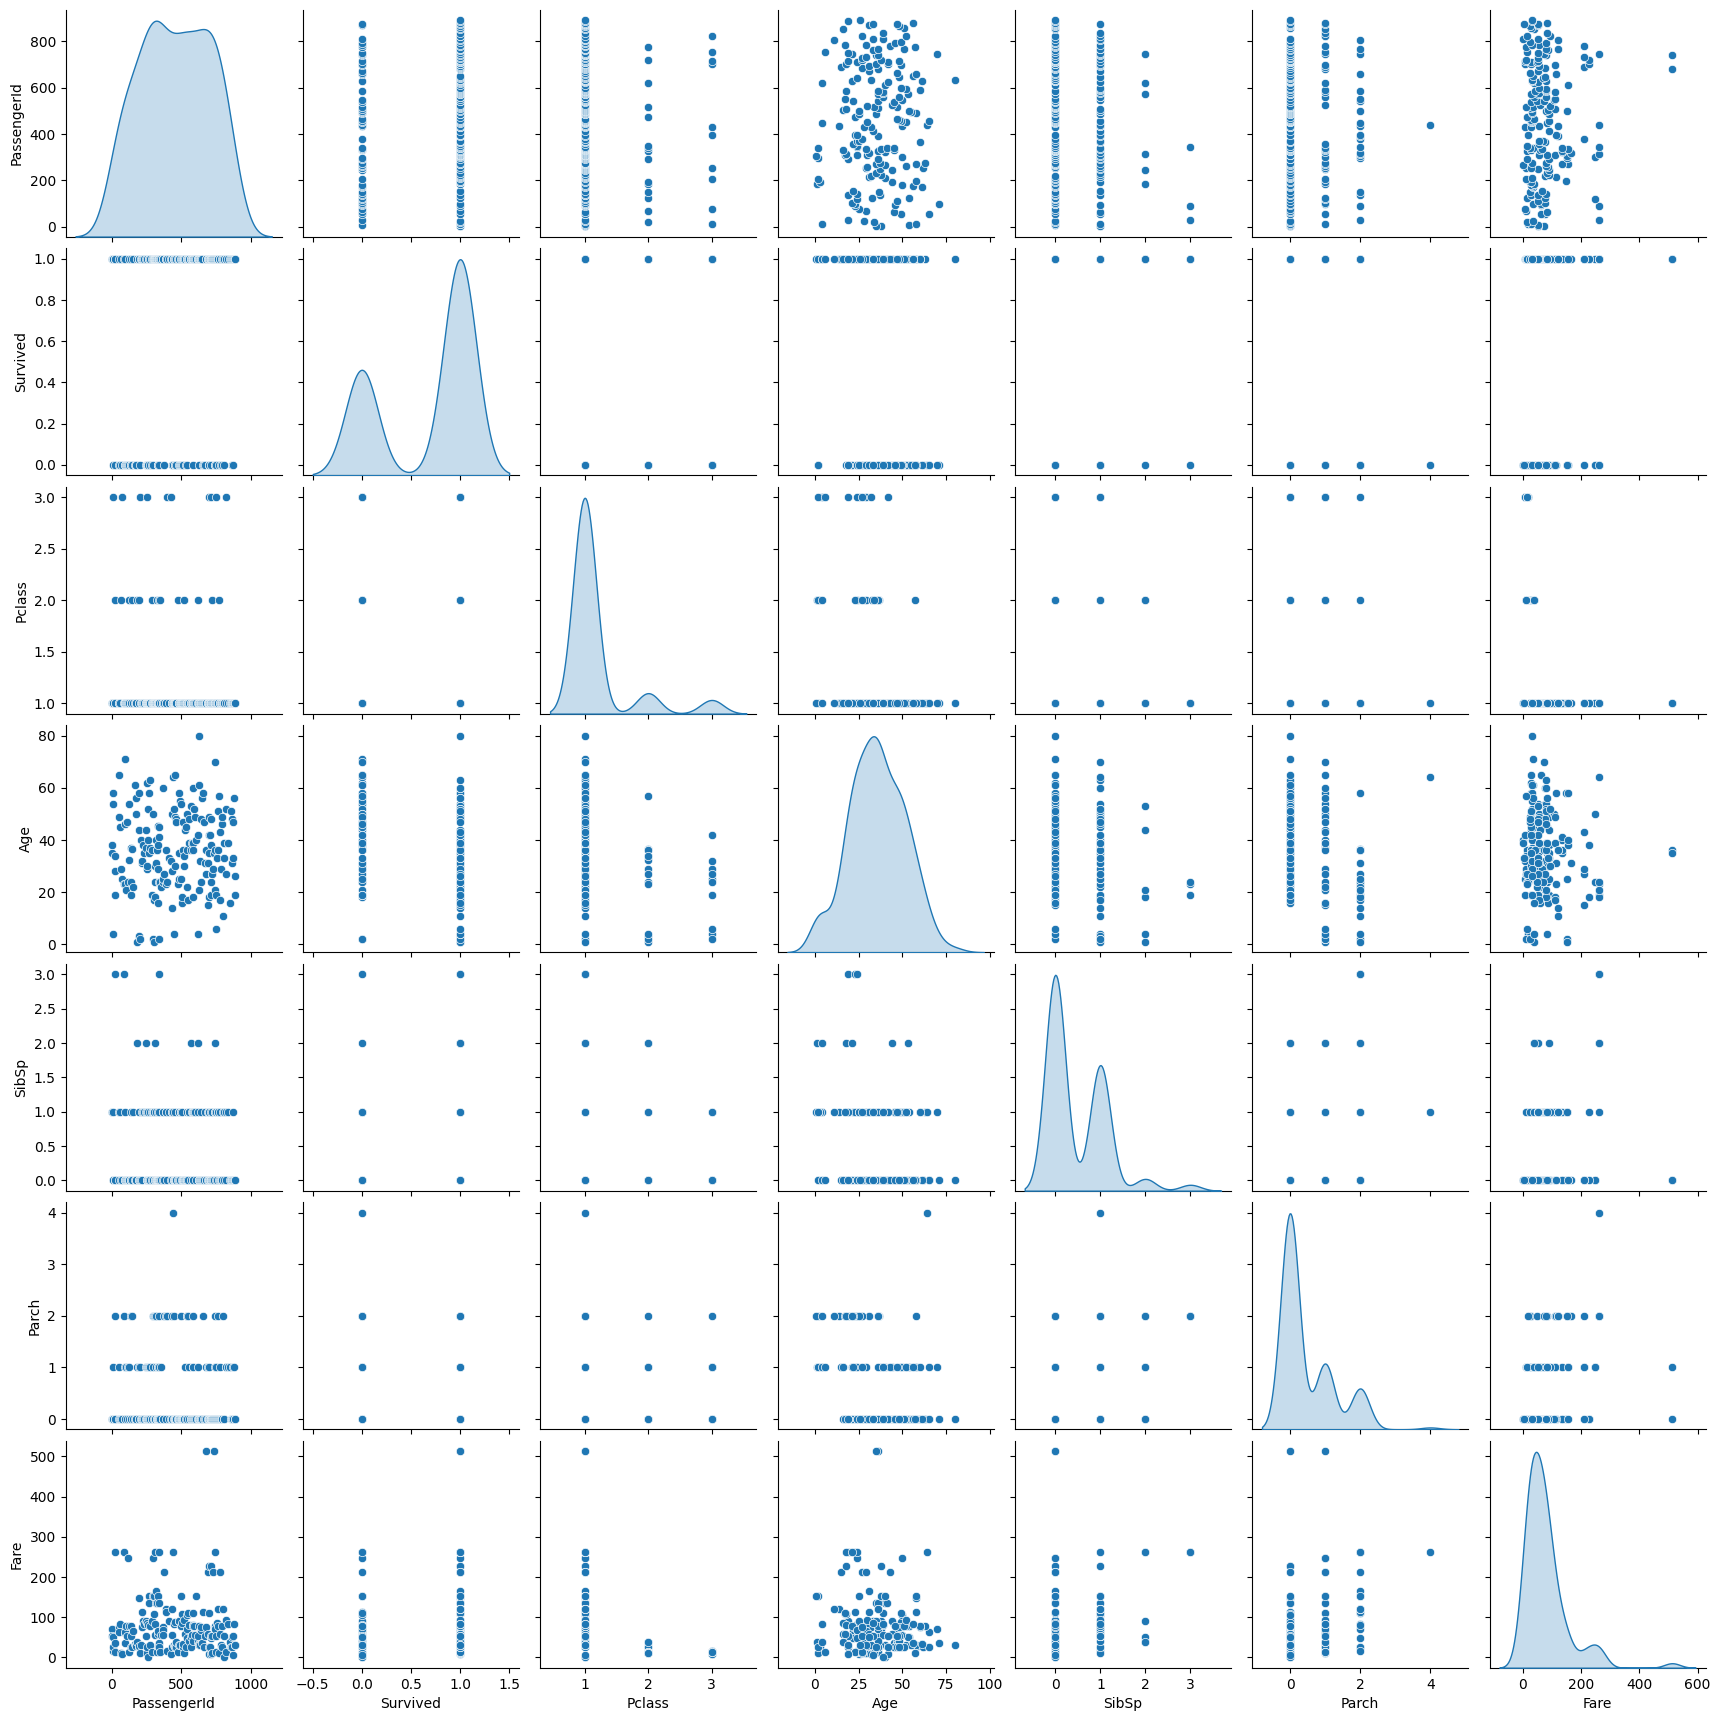

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pair plot for numerical variables
sns.pairplot(df, diag_kind='kde')  # kde for density plots on diagonal
plt.show()


2.Heatmaps to visualize correlations among multiple variables

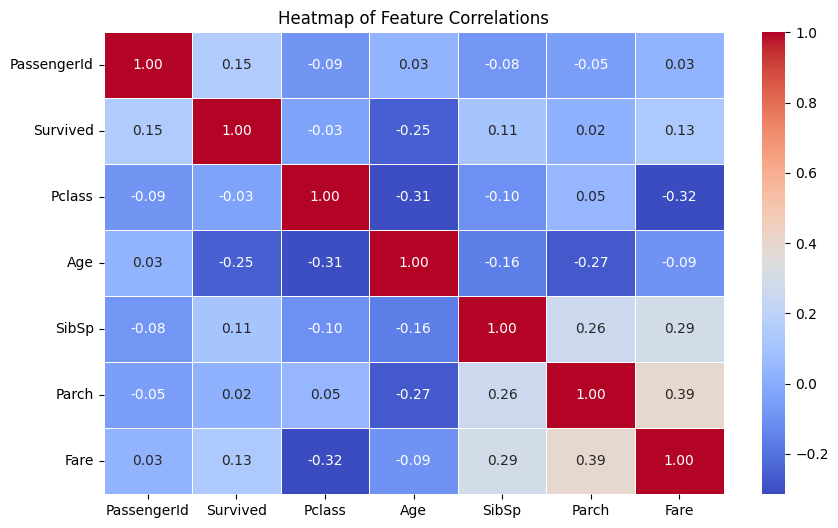

In [31]:
plt.figure(figsize=(10,6))
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation for numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()


3.Grouped comparisons to identify combined effects of multiple features

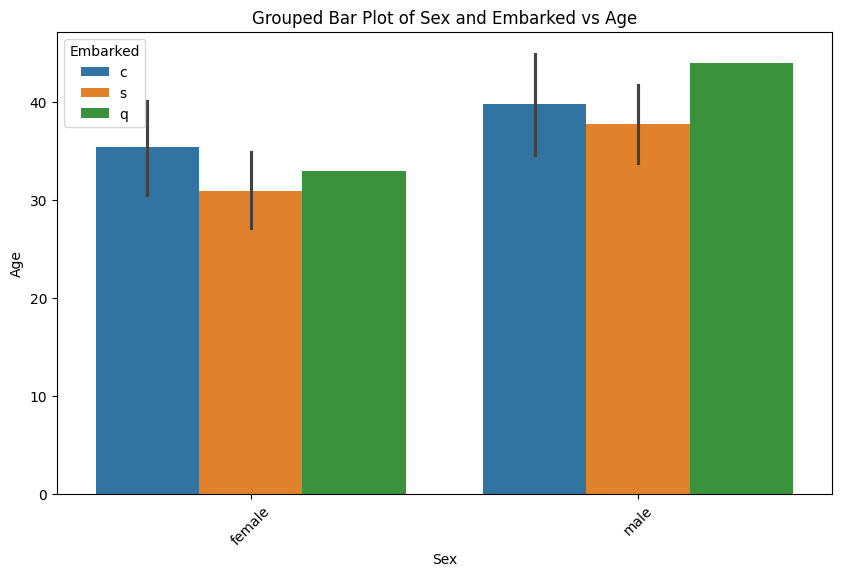

In [32]:
# Replace 'Category1', 'Category2', and 'NumericalColumn' with actual column names from your DataFrame
plt.figure(figsize=(10,6))
# Example: Replace with your actual column names
sns.barplot(x=df['Sex'], y=df['Age'], hue=df['Embarked'])
plt.title("Grouped Bar Plot of Sex and Embarked vs Age")  # Update title accordingly
plt.xticks(rotation=45)
plt.show()